In [1]:
import os

# from this:
# https://docs.llamaindex.ai/en/stable/examples/multi_modal/image_to_image_retrieval.html#plot-images-from-wikipedia

from PIL import Image
import matplotlib.pyplot as plt

from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import SimpleDirectoryReader, StorageContext

import qdrant_client

def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(3, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break

In [2]:
# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="img_db-test")

image_store = QdrantVectorStore(
    client=client, collection_name="image_collection"
)
storage_context = StorageContext.from_defaults(
     image_store=image_store
)

# Create the MultiModal index
documents = SimpleDirectoryReader("./mixed_wiki/").load_data()
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

/Users/josh/bob/lib/python3.12/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (105828854 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/josh/bob/lib/python3.12/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (105828854 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


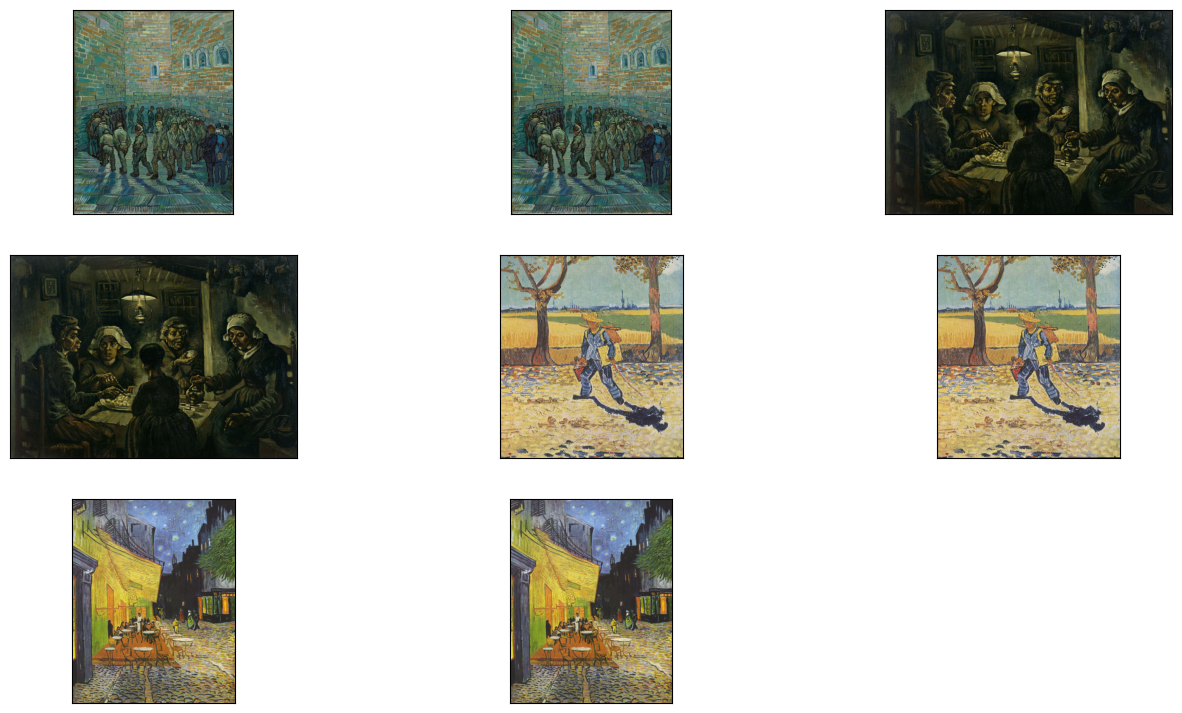

In [3]:
# generate Text retrieval results
retriever_engine = index.as_retriever(image_similarity_top_k=8)
# retrieve more information from the GPT4V response
retrieval_results = retriever_engine.image_to_image_retrieve("./mixed_wiki/27.jpg")
retrieved_images = []
for res in retrieval_results:
    retrieved_images.append(res.node.metadata["file_path"])

plot_images(retrieved_images)